<a href="https://colab.research.google.com/github/mcfatbeard57/Collabs_notebooks/blob/master/Keras_Regression_complete_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [0]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
#df.head()

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# ***EDA***





In [0]:
# plt.figure(figsize=(12,8))
# sns.distplot(df['price'])

In [0]:
#sns.countplot(df['bedrooms'])

In [0]:
#df.corr()['price'].sort_values()

In [0]:
# plt.figure(figsize=(12,8))
# sns.scatterplot(x='price',y='sqft_living',data=df)

In [0]:
# plt.figure(figsize=(12,8))
# sns.boxplot(x='bedrooms',y='price',data=df)

In [0]:
# plt.figure(figsize=(12,8))
# sns.scatterplot(x='price',y='long',data=df)

In [0]:
# plt.figure(figsize=(12,8))
# sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [23]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [26]:
len(df)*(0.01)

215.97

In [0]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

In [0]:
# plt.figure(figsize=(12,8))
# sns.scatterplot(x='long',y='lat',
#                 data=non_top_1_perc,hue='price',
#                 palette='RdYlGn',edgecolor=None,alpha=0.2)

In [0]:
#sns.boxplot(x='waterfront',y='price',data=df)

# Feature Engg.

In [0]:
df = df.drop('id',axis=1)

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

In [0]:
# plt.figure(figsize=(12,8))
# sns.boxplot(x='month',y='price',data=df)

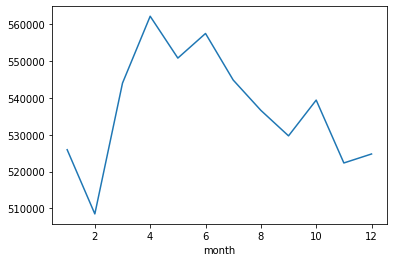

In [56]:
df.groupby('month').mean()['price'].plot()

In [0]:
# df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1)

# Scaling and Create Model

In [0]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
X_train.shape

(15117, 19)

# Imports

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [0]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the model

In [69]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 430240006144.0000 - val_loss: 418916728832.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429071400960.0000 - val_loss: 414842060800.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 413164896256.0000 - val_loss: 378835599360.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 337104502784.0000 - val_loss: 257064550400.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 187477688320.0000 - val_loss: 118251028480.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 105908240384.0000 - val_loss: 96337240064.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 98817703936.0000 - val_loss: 94791237632.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 97174716416.0000 - val_loss: 93261242368.0000
Epoch 9/400
119/119 [

In [0]:
loss_data = pd.DataFrame(model.history.history)

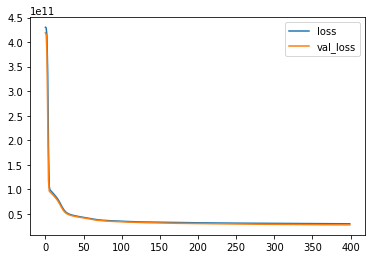

In [71]:
loss_data.plot()

# Evaluations

In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [0]:
predictions = model.predict(X_test)

In [74]:
mean_absolute_error(y_test,predictions)

102748.94010898919

In [76]:
np.sqrt(mean_squared_error(y_test,predictions))

165646.28435110976

In [78]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [79]:
explained_variance_score(y_test,predictions)

0.7931181503848039

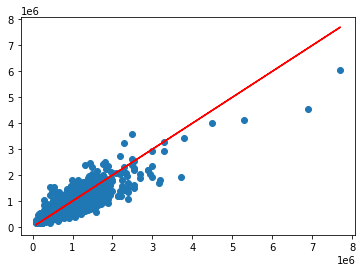

In [80]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

# Predicting on a brand new house

In [0]:
single_house = df.drop('price',axis=1).iloc[0]

In [0]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [83]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [84]:
model.predict(single_house)

array([[278674.84]], dtype=float32)

# Early Stopping

In [86]:
from google.colab import files
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [0]:
df2 = pd.read_csv(io.BytesIO(uploaded['cancer_classification.csv']))

# EDA

In [0]:
#sns.countplot(x='benign_0__mal_1',data=df2)

In [0]:
#df2.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [0]:
#sns.heatmap(df.corr())

## Train Test Split

In [0]:
X = df2.drop('benign_0__mal_1',axis=1).values
y = df2['benign_0__mal_1'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

## Scaling Data

In [0]:
scaler = MinMaxScaler()

In [100]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout

In [104]:
X_train.shape

(426, 30)

In [0]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

### Example One: Choosing too many epochs and overfitting!

In [0]:
# model.fit(x=X_train, 
#           y=y_train, 
#           epochs=600,
#           validation_data=(X_test, y_test), verbose=1
#           )

In [0]:
# model_loss = pd.DataFrame(model.history.history)
# model_loss.plot()

## Early Stopping

In [0]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
#help(EarlyStopping)

In [0]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [111]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6666 - val_loss: 0.6364
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6240 - val_loss: 0.5967
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5880 - val_loss: 0.5581
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5485 - val_loss: 0.5180
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5067 - val_loss: 0.4736
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4627 - val_loss: 0.4282
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4202 - val_loss: 0.3852
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3778 - val_loss: 0.3452
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3397 - val_loss: 0.3073
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3063 - val_loss: 0.2736
Epoch 11/

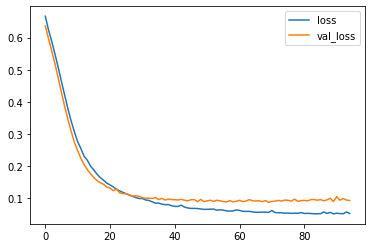

In [112]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Drop out layers

In [0]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [114]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6956 - val_loss: 0.6666
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6556 - val_loss: 0.6402
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6433 - val_loss: 0.6103
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6107 - val_loss: 0.5843
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5983 - val_loss: 0.5557
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5943 - val_loss: 0.5293
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5487 - val_loss: 0.5028
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5190 - val_loss: 0.4691
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4659 - val_loss: 0.4212
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4558 - val_loss: 0.3867
Epoch 11/

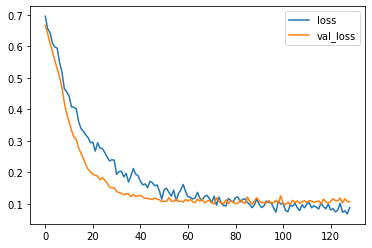

In [115]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [116]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [119]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
